In [ ]:
# Use seaborn for pairplot.
!pip install -q seaborn


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
url = 'https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors_weekly_CSV.zip'

raw_dataset = pd.read_csv(url, skiprows = 3, index_col=0, nrows=1100)

In [4]:
dataset = raw_dataset.copy()
dataset.tail()

,Mkt-RF,SMB,HML,RF
19470703,3.14,0.65,1.71,0.007
19470711,1.91,1.42,0.52,0.007
19470718,0.03,0.06,-0.09,0.007
19470725,1.60,0.46,1.57,0.007
19470801,-1.90,-1.43,-1.04,0.007


In [ ]:
small_minus_big = np.array(dataset['SMB'])

smb_normalizer = layers.Normalization(input_shape=[1,], axis=None)
smb_normalizer.adapt(small_minus_big)

In [ ]:
smb_model = tf.keras.Sequential([
    smb_normalizer,
    layers.Dense(units=1)
])

smb_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 1)                3         
 n)                                                              
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [ ]:
smb_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')



In [ ]:
%%time
history = smb_model.fit(
    dataset['SMB'],
    np.array(dataset['Mkt-RF']),
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 6.75 s, sys: 350 ms, total: 7.1 s
Wall time: 6.72 s


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,2.577968,1.358180,95
96,2.583255,1.402990,96
97,2.580621,1.382664,97
98,2.589075,1.399727,98
99,2.581447,1.417939,99


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

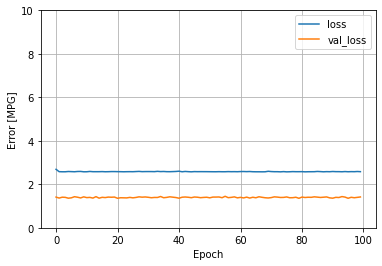

In [ ]:
plot_loss(history)

In [ ]:
x = tf.linspace(-10, 10, 500)
y = smb_model.predict(x)


In [ ]:
def plot_smb(x, y):
  plt.scatter(dataset['SMB'], dataset['Mkt-RF'], label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('SMB')
  plt.ylabel('Mkt-RF')
  plt.legend()

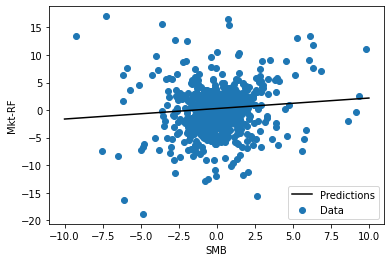

In [ ]:
plot_smb(x, y)